<a href="https://colab.research.google.com/github/JavadZandiyeh/AUT-DIP-Projects/blob/main/DIP_HW4_9831032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW' -O 'HW4_data.zip'
!unzip HW4_data.zip

--2024-01-24 22:07:21--  https://drive.google.com/uc?export=download&id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW
Resolving drive.google.com (drive.google.com)... 173.194.217.101, 173.194.217.100, 173.194.217.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW&export=download [following]
--2024-01-24 22:07:21--  https://drive.usercontent.google.com/download?id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.213.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1706229 (1.6M) [application/octet-stream]
Saving to: ‘HW4_data.zip’

HW4_data.zip        100%[===================>]   1.63M  --.-

# Imports




In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

# Any Helper Functions



In [ ]:
def image_show1(ax, image, title, vmin=0, vmax=255, cmap='gray'):
    ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.axis('off') # Hide axis labels
    ax.set_title(title, color='white', backgroundcolor='green')

def image_show2(image, title, vmin=0, vmax=255, cmap='gray', figsize=(6, 4)):
    plt.figure(figsize=figsize) # Set figure size
    plt.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off') # Hide axis labels
    plt.title(title, color='white', backgroundcolor='green') # Set title
    plt.show()

def hist_show(image, title):
    hist, bins = np.histogram(image.flatten(), bins=64, range=[0, 255])
    plt.bar(bins[:-1], hist, width=0.5, align='edge', color='black')
    plt.title(title, color='white', backgroundcolor='green')

# Question 5: Edge Detection (15%)

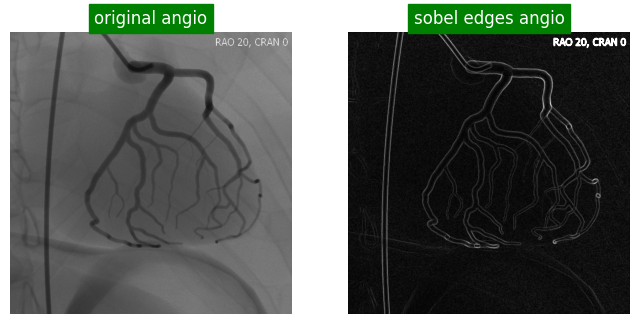

In [ ]:
#@title Q5 - Part 1 (Sobel) (5%)
img1 = cv2.imread('angio.png', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
image_show1(ax[0], img1, 'original angio')
image_show1(ax[1], sobel_edges, 'sobel edges angio')

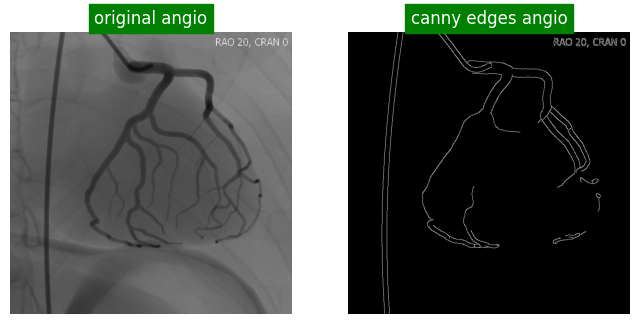

In [ ]:
#@title Q5 - Part 2 (Canny) (5%)
canny_edges = cv2.Canny(img1, 50, 150)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
image_show1(ax[0], img1, 'original angio')
image_show1(ax[1], canny_edges, 'canny edges angio')

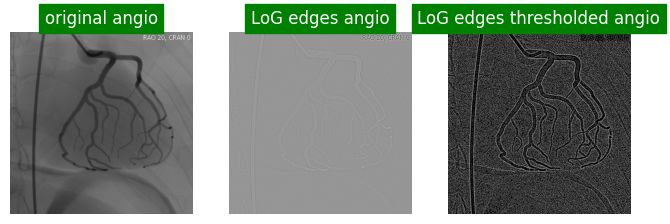

In [ ]:
#@title Q5 - Part 3 (LoG) (5%)
log_edges = cv2.Laplacian(cv2.GaussianBlur(img1, (5, 5), 0), cv2.CV_64F)
log_edges = cv2.normalize(log_edges, None, 0, 255, cv2.NORM_MINMAX)

log_edges_t = log_edges.copy() # thresholding
log_edges_t[log_edges_t > np.mean(log_edges_t)] = 0

fig, ax = plt.subplots(1, 3, figsize=(8, 4))
image_show1(ax[0], img1, 'original angio')
image_show1(ax[1], log_edges, 'LoG edges angio')
image_show1(ax[2], log_edges_t, 'LoG edges thresholded angio')

# Question 6: Hough Transform (15%)

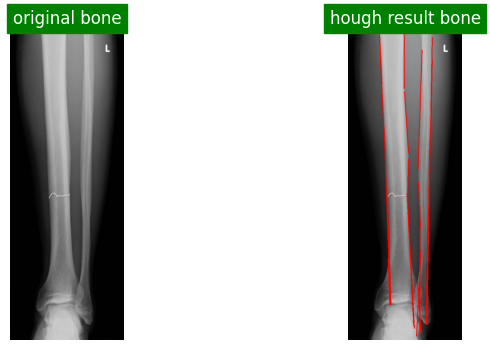

In [ ]:
#@title Q6 - Part 1 (60%)
img2 = cv2.imread('bone.jpg', cv2.IMREAD_GRAYSCALE)

# make a copy of image
img2_copy = img2.copy()
img2_copy = cv2.cvtColor(img2_copy, cv2.COLOR_GRAY2BGR)

# detect edges using canny method
# the Gaussian filter waw not used because it distorts the edge detections for the right bone.
canny_edges = cv2.Canny(img2_copy, 50, 150)

# findout hough lines
hough_lines = cv2.HoughLinesP(canny_edges, 1, np.pi / 180, threshold=60, minLineLength=100, maxLineGap=180)

# draw the detected lines on the copy of the image
for line in hough_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img2_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
image_show1(ax[0], img2, 'original bone')
image_show1(ax[1], img2_copy, 'hough result bone')

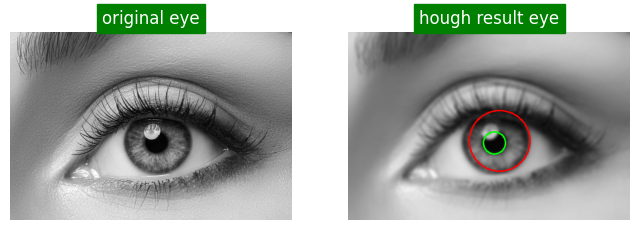

In [ ]:
#@title Q6 - Part 2 (40%)
img3 = cv2.imread('eye.jpg', cv2.IMREAD_GRAYSCALE)

# make a copy of image
img3_copy = img3.copy()
img3_copy = cv2.cvtColor(img3_copy, cv2.COLOR_GRAY2BGR)

# # gaussian blurred
img3_copy = cv2.GaussianBlur(img3_copy, (9, 9), 3)

def circule_color(img, img_copy, minDist, minRadius, maxRadius, color, pos1, pos2):
    # use HoughCircles to detect circle
    circles = cv2.HoughCircles(
        img,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=minDist,
        param1=50,
        param2=30,
        minRadius=minRadius,
        maxRadius=maxRadius
    )

    # if circles are found, draw them on the copy of the image
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, pos1:pos2]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(img_copy, center, radius, color, 2)


circule_color(img3, img3_copy, 100, 46, 60, (255, 0, 0), 1, 2) # greater circle
circule_color(img3, img3_copy, 30, 20, 35, (0, 255, 0), 8, 9) # smaller circle

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
image_show1(ax[0], img3, 'original eye')
image_show1(ax[1], img3_copy, 'hough result eye')

# Question 7: Feature-Based Registration (20%)

In [ ]:
img4 = cv2.imread('MRIF.png', cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('MRIS.png', cv2.IMREAD_GRAYSCALE)

def point_details(image, image_name):
    selected_point = None

    def mouse_callback(event, x, y):
        global selected_point

        if event == cv2.EVENT_LBUTTONDOWN:
            selected_point = (x, y)
            print(selected_point)

    cv2.namedWindow('Image')
    cv2.setMouseCallback('Image', mouse_callback)

    while True:
        cv2.imshow(image_name, image)

        if cv2.waitKey(1) == 27 or selected_point:
            break

    cv2.destroyAllWindows()

# The following parts were not executed in Colab, and the results were derived from running locally
# point_details(img4, 'MRIF')
# point_details(img5, 'MRIS')

!gdown --id 1ISh1GxY4MwEGmMYas0kWF1B-LhtVpn54
!unzip HW4_Additional.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ISh1GxY4MwEGmMYas0kWF1B-LhtVpn54
To: /content/HW4_Additional.zip
100% 1.24M/1.24M [00:00<00:00, 134MB/s]
Archive:  HW4_Additional.zip
   creating: HW4_Additional/
  inflating: HW4_Additional/MRIS3.png  
  inflating: __MACOSX/HW4_Additional/._MRIS3.png  
  inflating: HW4_Additional/MRIF2.png  
  inflating: __MACOSX/HW4_Additional/._MRIF2.png  
  inflating: HW4_Additional/MRIF3.png  
  inflating: __MACOSX/HW4_Additional/._MRIF3.png  
  inflating: HW4_Additional/MRIS2.png  
  inflating: __MACOSX/HW4_Additional/._MRIS2.png  
  inflating: HW4_Additional/MRIF1.png  
  inflating: __MACOSX/HW4_Additional/._MRIF1.png  
  inflating: HW4_Additional/MRIS1.png  
  inflating: __MACOSX/HW4_Additional/._MRIS1.png  
  inflating: HW4_Addit

MRIF1(y: 68, x: 81)  -- MRIS1(y: 257, x: 158) 
 MRIF2(y: 115, x: 82)  -- MRIS2(y: 342, x: 197) 
 MRIF3(y: 76, x: 136) -- MRIS3(y: 220, x: 233) 
 MRIF4(y: 106, x: 133) -- MRIS4(y: 263, x: 261)


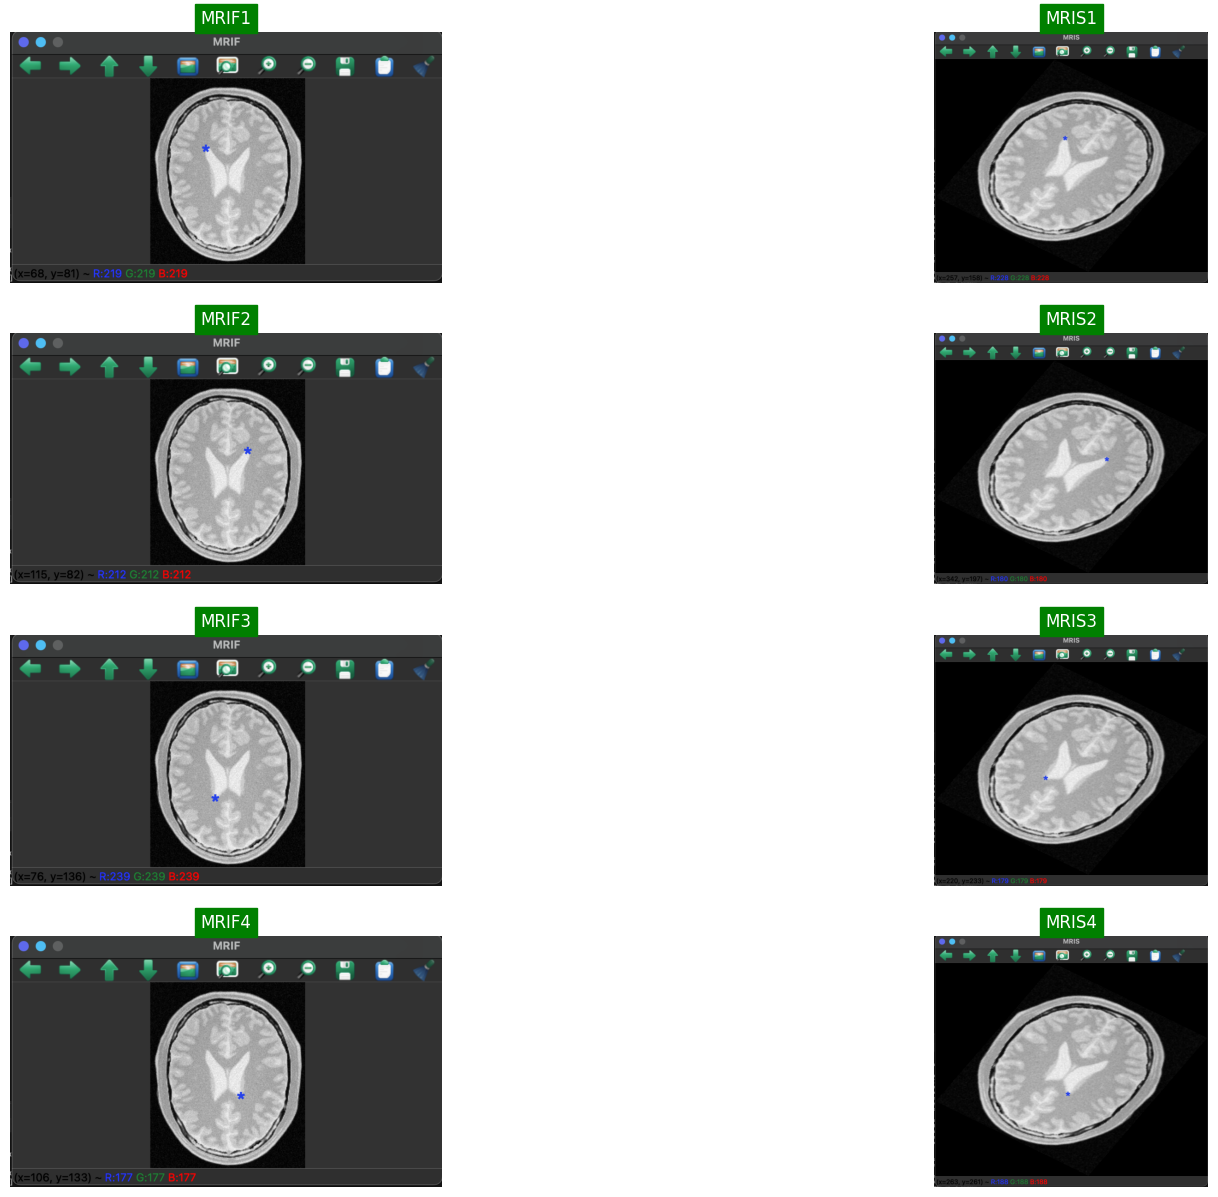

In [ ]:
print(
    'MRIF1(y: 68, x: 81)  -- MRIS1(y: 257, x: 158)', '\n',
    'MRIF2(y: 115, x: 82)  -- MRIS2(y: 342, x: 197)', '\n',
    'MRIF3(y: 76, x: 136) -- MRIS3(y: 220, x: 233)', '\n',
    'MRIF4(y: 106, x: 133) -- MRIS4(y: 263, x: 261)',
)

fig, ax = plt.subplots(4, 2, figsize=(20, 15))
image_show1(ax[0][0], cv2.imread('HW4_Additional/MRIF1.png'), 'MRIF1')
image_show1(ax[0][1], cv2.imread('HW4_Additional/MRIS1.png'), 'MRIS1')
image_show1(ax[1][0], cv2.imread('HW4_Additional/MRIF2.png'), 'MRIF2')
image_show1(ax[1][1], cv2.imread('HW4_Additional/MRIS2.png'), 'MRIS2')
image_show1(ax[2][0], cv2.imread('HW4_Additional/MRIF3.png'), 'MRIF3')
image_show1(ax[2][1], cv2.imread('HW4_Additional/MRIS3.png'), 'MRIS3')
image_show1(ax[3][0], cv2.imread('HW4_Additional/MRIF4.png'), 'MRIF4')
image_show1(ax[3][1], cv2.imread('HW4_Additional/MRIS4.png'), 'MRIS4')

In [ ]:
# now we have tie points and we can find out the registration function

M = np.array(
    [
        [81, 68, 1],
        [82, 115, 1],
        [136, 76, 1],
        [133, 106, 1]
    ]
)

beta1 = np.array([[158], [197], [233], [261]])
beta2 = np.array([[257], [342], [220], [263]])

alpha1 = np.linalg.inv(M.T @ M) @ M.T @ beta1
alpha2 = np.linalg.inv(M.T @ M) @ M.T @ beta2
third_row = np.array([0, 0, 1]).reshape(1, -1)

transformation = np.vstack((alpha1.T, alpha2.T, third_row))

print(transformation)

[[  1.31596988   0.87790098  -9.98321199]
 [ -1.07146775   1.68520312 232.44373254]
 [  0.           0.           1.        ]]


# Question 8: Similarity-based Segmentation (20%)

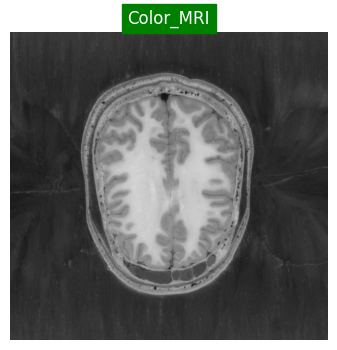

In [ ]:
#@title Q8 - Part 1
img6 = cv2.imread('Color_MRI.png', cv2.IMREAD_GRAYSCALE)
image_show2(img6, 'Color_MRI')

In [ ]:
#@title Q8 - Part 2

# must be run locally, and can not be executed in Colab
# point_details(img6, 'Color_MRI')

gray_seed = (276, 423)
white_seed = (385, 342)

In [ ]:
#@title Q8 - Part 3 (5%)
img6_empty = np.zeros_like(img6)
img6_empty[gray_seed] = 190
img6_empty[white_seed] = 200

In [ ]:
#@title Q8 - Part 4 (50%)

def region_growing(image, seed, param0, param1, param2, param3=1):
    """
        image: (height, width)
        seed: (x, y)
        param0: kernel type (4, 8)
        param1: type of the threshold calculation (variable, constant)
        param2: the acceptable difference from the threshold
    """

    # create a binary mask initialized with zeros
    height, width = image.shape[:2]
    segmented = np.zeros_like(image)

    # define neighbors for growing pixels
    if param0 == 4:
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    else:
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # base threshold
    threshold = image[seed]

    # constant type region growing
    queue = [seed]

    counter = 0

    while queue:
        current_pixel = queue.pop(0)
        x, y = current_pixel

        # check if the pixel is inside the image bounds
        if 0 <= x < height and 0 <= y < width:
            # check if the pixel is not already part of the segmented region
            if segmented[x, y] == 0:
                # check the intensity difference between the current pixel and the seed
                diff = abs(int(image[x, y]) - int(threshold))

                # if the difference is below the threshold, add the pixel to the segmented region
                if diff < param2:
                    segmented[x, y] = param3

                    if param1 == 'variable':
                        threshold = (threshold * counter + image[x, y]) / (counter + 1)

                    # add neighboring pixels to the queue for further processing
                    for neighbor in neighbors:
                        nx, ny = neighbor
                        queue.append((x + nx, y + ny))

        counter += 1


    return segmented, counter

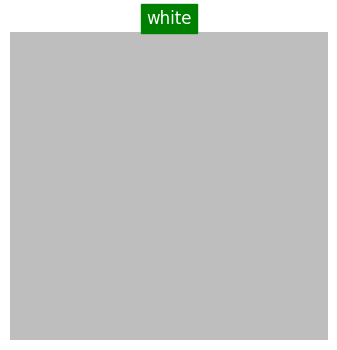

2679145


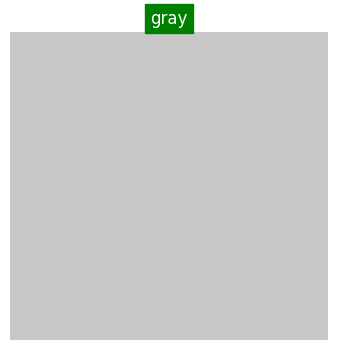

2679145


In [ ]:
#@title Q8 - Part 5 (15%)
region_w, counter_w = region_growing(img6_empty, white_seed, 4, 'constant', 220, 190)
image_show2(region_w, 'white')
print(counter_w)

region_g, counter_g = region_growing(img6_empty, gray_seed, 4, 'constant', 220, 200)
image_show2(region_g, 'gray')
print(counter_g)

قاعدتا وقتی که صفحه خالی است، تا جای ممکن همسایه ها اضافه میشوند به بخش و همه صفحه به تدریج درون بخش قرار میگیرد و مانند شکل های بالا تمام صفحع سفید میشوند

In [ ]:
#@title Q8 - Part 6 (10%)
gray_segment_v, gray_counter_v = region_growing(img6, gray_seed, 4, 'variable', 30)
gray_segment_c, gray_counter_c = region_growing(img6, gray_seed, 4, 'constant', 30)

white_segment_v, white_counter_v = region_growing(img6, white_seed, 4, 'variable', 30)
white_segment_c, white_counter_c = region_growing(img6, white_seed, 4, 'constant', 30)

In [ ]:
#@title Q8 - Part 7 (5%)
print(f'gray_counter_v: {gray_counter_v}, gray_counter_c: {gray_counter_c}, white_counter_v: {white_counter_v}, white_counter_c: {white_counter_c}')

gray_counter_v: 466409, gray_counter_c: 467053, white_counter_v: 230457, white_counter_c: 197649


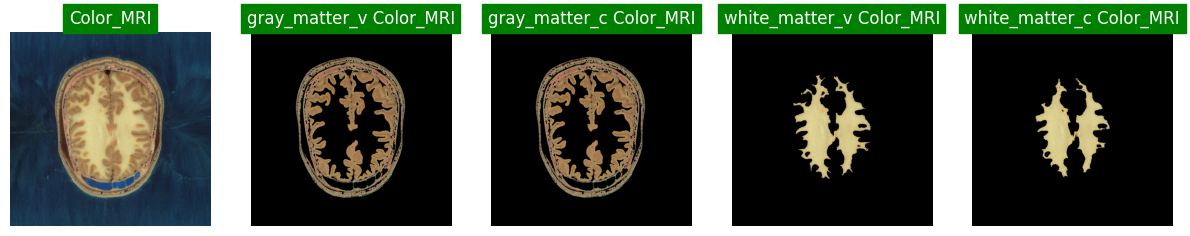

In [ ]:
#@title Q8 - Part 8 (15%)
img6_colored = cv2.imread('Color_MRI.png')
img6_colored = cv2.cvtColor(img6_colored, cv2.COLOR_BGR2RGB)

gray_segment_v_3 = np.repeat(gray_segment_v[:, :, np.newaxis], 3, axis=2)
img6_gray_matter_v = gray_segment_v_3 * img6_colored

gray_segment_c_3 = np.repeat(gray_segment_c[:, :, np.newaxis], 3, axis=2)
img6_gray_matter_c = gray_segment_c_3 * img6_colored


white_segment_v_3 = np.repeat(white_segment_v[:, :, np.newaxis], 3, axis=2)
img6_white_matter_v = white_segment_v_3 * img6_colored

white_segment_c_3 = np.repeat(white_segment_c[:, :, np.newaxis], 3, axis=2)
img6_white_matter_c = white_segment_c_3 * img6_colored

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
image_show1(ax[0], img6_colored, 'Color_MRI')
image_show1(ax[1], img6_gray_matter_v, 'gray_matter_v Color_MRI')
image_show1(ax[2], img6_gray_matter_c, 'gray_matter_c Color_MRI')
image_show1(ax[3], img6_white_matter_v, 'white_matter_v Color_MRI')
image_show1(ax[4], img6_white_matter_c, 'white_matter_c Color_MRI')

هر دو روش ثابت و متغیر خوب عمل کرده اند، اما بار محاسباتی روش متغیر بیشتر است، در عوض مانند روش ثابت، از پیش روی و بهتر بخش بندی کردن مانع نمیشود. در روش ثابت ممکن است با تعداد پیشروی کمی متقوف شویم زیرا قاعده آستانه سختگیرانه تری دارد اما روش متغیر اجازه حرکت بیشتری به ما میدهد.